___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
Pedro Isidoro Maciel


## O Papel Social das Escolas

___
## Introdução

Este projeto tem como objetivo verificar de que maneira se dá a relação entre o grau de escolaridade do indivíduo
e a quantidade de filhos que o mesmo possui, bem como o grau de correlação entre estas vertentes. E de que maneira
esta relação se altera no ano de 2011 para o ano de 2015.
O projeto tomará como base as PNADS dos anos de 2011 e 2015

Estudo semelhante foi feito pelo IBGE, analisando as mulheres brasileiras:
http://g1.globo.com/ma/maranhao/noticia/2012/10/segundo-ibge-mulheres-com-maior-nivel-de-escolaridade-tem-menos-filhos.html


Como afirma a especialista em direitos sociais, sexuais e reprodutivos, "as mães de menor grau de escolaridade 
possuem também menos acesso aos métodos contraceptivos, têm menos informação e educação que são aliados
da livre escolha."

___
## Filtros da base de dados

In [85]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [117]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pedro\Documents\2 SEMESTRE\Ciencia dos Dados\DP\Projeto 1


In [118]:
dados = pd.read_csv('PES2015.csv',sep=',')
dad = pd.read_csv('PES2011.csv',sep=',')

In [88]:
# Frequentou pelo menos 1 vez escola 
dados.loc[(dados.V0606 == 2), 'FREQUENTOU_ESCOLA'] = 'Sim'
dados.loc[(dados.V0606 == 4), 'FREQUENTOU_ESCOLA'] = 'Não'

# Curso mais elevado que frequentou
dados.loc[(dados.V6007 == 1), 'FORMACAO'] = 'Elementar'
dados.loc[(dados.V6007 == 2), 'FORMACAO'] = 'Médio_1ciclo'
dados.loc[(dados.V6007 == 3), 'FORMACAO'] = 'Médio_2ciclo'
dados.loc[(dados.V6007 == 4), 'FORMACAO'] = 'Ensino_Fundamental'
dados.loc[(dados.V6007 == 5), 'FORMACAO'] = 'Ensino_Médio'
dados.loc[(dados.V6007 == 6), 'FORMACAO'] = 'EJA_1grau'
dados.loc[(dados.V6007 == 7), 'FORMACAO'] = 'EJA_2grau'
dados.loc[(dados.V6007 == 8), 'FORMACAO'] = 'Ensino_Superior'
dados.loc[(dados.V6007 == 9), 'FORMACAO'] = 'Mestrado-Doutorado'
dados.loc[(dados.V6007 == 10), 'FORMACAO'] = 'Alfabet_Adulta'
dados.loc[(dados.V6007 == 11), 'FORMACAO'] = 'Creche'
dados.loc[(dados.V6007 == 12), 'FORMACAO'] = 'Alfabetizacao'
dados.loc[(dados.V6007 == 13), 'FORMACAO'] = 'Maternal'

# Número de filhos tidos do sexo masculino
                              



In [89]:
d = dados.loc[:,[ 'FORMACAO', 'V1141', 'V1142', "FREQUENTOU_ESCOLA"]]
d.columns = ["FORMACAO", "FILHOSHOMENS", "FILHASMULHERES", "FREQUENTOU_ESCOLA"]


___
## Análise e Resultados

### Começamos analisando a quantidade de filhos que possuem aqueles que tiveram a alfabetização como a última série de ensino. 
#### (HISTOGRAMA - FREQUÊNCIA)

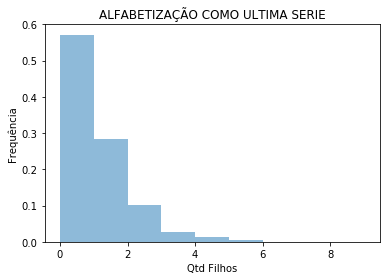

In [150]:
faixa = arange (0, 10, 1)
plot = d.FILHOSHOMENS[d.FORMACAO == 'Alfabetizacao'].plot.hist(bins=faixa,title = 'ALFABETIZAÇÃO COMO ULTIMA SERIE', normed = 1, alpha=0.5)
plt.ylabel('Frequência')
plt.xlabel('Qtd Filhos')



### Quantidade de filhos daqueles que nunca frequentaram uma instuição de ensino sequer uma vez:
#### (HISTOGRAMA - FREQUÊNCIA)

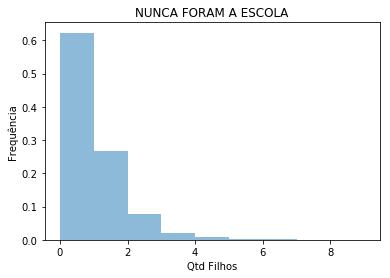

In [114]:
faixa = arange (0, 10, 1)

plot = d.FILHOSHOMENS[d.FREQUENTOU_ESCOLA == 'Não'].plot.hist(bins=faixa,title = 'NUNCA FORAM A ESCOLA', normed = 1, alpha=0.5)
plt.ylabel('Frequência')
plt.xlabel('Qtd Filhos')


### Aqueles que pelo menos uma vez frequentaram a escola:
#### (HISTOGRAMA - FREQUÊNCIA)

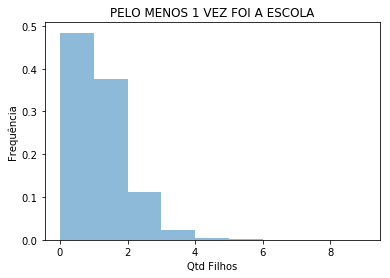

In [95]:
faixa = arange (0, 10, 1)

plot = d.FILHOSHOMENS[d.FREQUENTOU_ESCOLA == 'Sim'].plot.hist(bins=faixa,title = 'PELO MENOS 1 VEZ FOI A ESCOLA', normed = 1, alpha=0.5)
plt.ylabel('Frequência')
plt.xlabel('Qtd Filhos')

### Mestres e Doutores:
#### (HISTOGRAMA - FREQUÊNCIA)

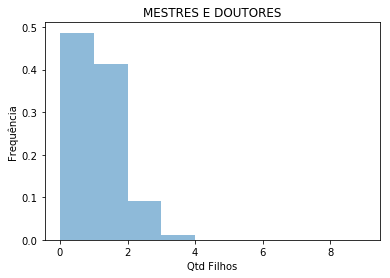

In [123]:
faixa = arange (0, 10, 1)
plot = d.FILHOSHOMENS[d.FORMACAO == 'Mestrado-Doutorado'].plot.hist(bins=faixa,title = 'MESTRES E DOUTORES', normed = 1, alpha=0.5)
plt.ylabel('Frequência')
plt.xlabel('Qtd Filhos')

In [152]:
MTSFilhos = d[  (d.FILHOSHOMENS > 5) | (d.FILHASMULHERES > 5)].loc[:,[ 'FORMACAO', 'V1141', 'V1142' ]]
MTSFilhos.head()

,FORMACAO,V1141,V1142
7043,EJA_1grau,NaN,NaN
7204,Ensino_Fundamental,NaN,NaN
7430,Ensino_Fundamental,NaN,NaN
10241,Ensino_Fundamental,NaN,NaN
10372,NaN,NaN,NaN


### Verificando como se comporta, de modo geral, a variável qualitativa no que diz respeito a formação educacional da pessoa que tem 5 filhos ou mais.
#### (GRÁFICO DE PIZZA - FREQ. RELATIVA)

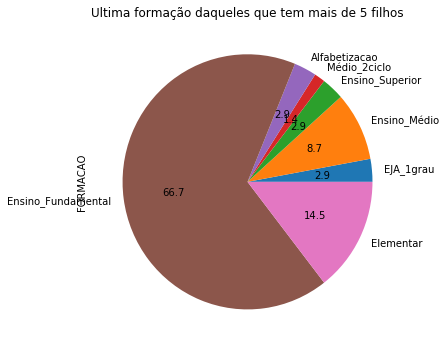

In [154]:
ut4 = (MTSFilhos.FORMACAO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut4.plot(kind='pie',title='Ultima formação daqueles que tem mais de 5 filhos',autopct='%.1f')


plt.tight_layout()
plt.show()

### Formação educacional de quem tem poucos filhos:
#### (GRÁFICO DE PIZZA - FREQ. RELATIVA)

In [141]:
POUCOSFilhos = d[  (d.FILHOSHOMENS > 0) & (d.FILHOSHOMENS < 3) | (d.FILHASMULHERES > 0) & (d.FILHASMULHERES < 3) ].loc[:,[ 'FORMACAO', 'V1141', 'V1142' ]]
POUCOSFilhos.head()

,FORMACAO,V1141,V1142
9,Elementar,NaN,NaN
11,Ensino_Fundamental,NaN,NaN
13,Ensino_Médio,NaN,NaN
16,Ensino_Médio,NaN,NaN
22,Ensino_Superior,NaN,NaN


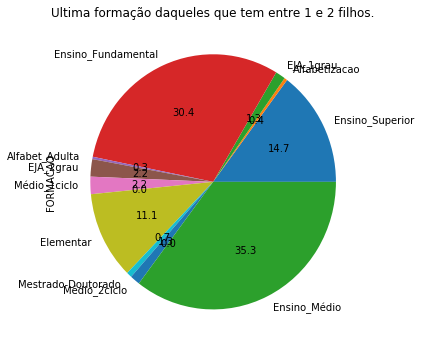

In [155]:
ut5 = (POUCOSFilhos.FORMACAO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut5.plot(kind='pie',title='Ultima formação daqueles que tem entre 1 e 2 filhos.',autopct='%.1f')


plt.tight_layout()
plt.show()

### De quem não tem filhos:
#### (GRÁFICO DE PIZZA - FREQ. RELATIVA)

In [111]:
SEMFilhos = d[  (d.FILHOSHOMENS < 1) | (d.FILHASMULHERES < 1)].loc[:,[ 'FORMACAO', 'V1141', 'V1142' ]]
SEMFilhos.head()

,FORMACAO,V1141,V1142
2,NaN,NaN,NaN
9,Elementar,NaN,NaN
10,Ensino_Fundamental,NaN,NaN
11,Ensino_Fundamental,NaN,NaN
13,Ensino_Médio,NaN,NaN


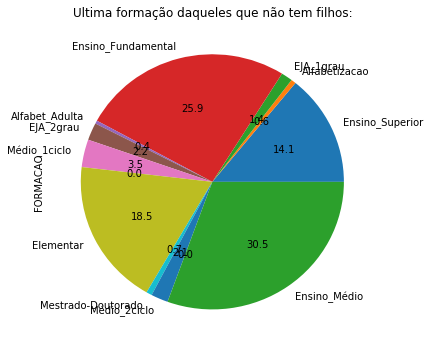

In [132]:
ut6 = (SEMFilhos.FORMACAO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut6.plot(kind='pie',title='Ultima formação daqueles que não tem filhos:',autopct='%.1f')


plt.tight_layout()
plt.show()

___
## ANO DE 2011

### Mesmo estudo realizado


In [119]:
# Frequentou pelo menos 1 vez escola 
dad.loc[(dad.V0606 == 2), 'FREQUENTOU_ESCOLA'] = 'Sim'
dad.loc[(dad.V0606 == 4), 'FREQUENTOU_ESCOLA'] = 'Não'

# Curso mais elevado que frequentou
dad.loc[(dad.V6007 == 1), 'FORMACAO'] = 'Elementar'
dad.loc[(dad.V6007 == 2), 'FORMACAO'] = 'Médio_1ciclo'
dad.loc[(dad.V6007 == 3), 'FORMACAO'] = 'Médio_2ciclo'
dad.loc[(dad.V6007 == 4), 'FORMACAO'] = 'Ensino_Fundamental'
dad.loc[(dad.V6007 == 5), 'FORMACAO'] = 'Ensino_Médio'
dad.loc[(dad.V6007 == 6), 'FORMACAO'] = 'EJA_1grau'
dad.loc[(dad.V6007 == 7), 'FORMACAO'] = 'EJA_2grau'
dad.loc[(dad.V6007 == 8), 'FORMACAO'] = 'Ensino_Superior'
dad.loc[(dad.V6007 == 9), 'FORMACAO'] = 'Mestrado-Doutorado'
dad.loc[(dad.V6007 == 10), 'FORMACAO'] = 'Alfabet_Adulta'
dad.loc[(dad.V6007 == 11), 'FORMACAO'] = 'Creche'
dad.loc[(dad.V6007 == 12), 'FORMACAO'] = 'Alfabetizacao'
dad.loc[(dad.V6007 == 13), 'FORMACAO'] = 'Maternal'

# Número de filhos tidos do sexo masculino
                              


In [120]:
d2 = dad.loc[:,[ 'FORMACAO', 'V1141', 'V1142', "FREQUENTOU_ESCOLA"]]
d2.columns = ["FORMACAO", "FILHOSHOMENS", "FILHASMULHERES", "FREQUENTOU_ESCOLA"]


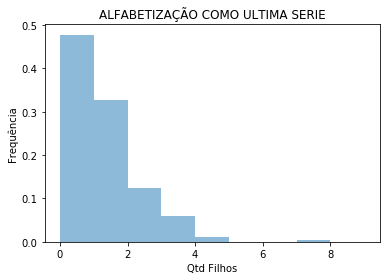

In [121]:
faixa = arange (0, 10, 1)
plot = d2.FILHOSHOMENS[d2.FORMACAO == 'Alfabetizacao'].plot.hist(bins=faixa,title = 'ALFABETIZAÇÃO COMO ULTIMA SERIE', normed = 1, alpha=0.5)
plt.ylabel('Frequência')
plt.xlabel('Qtd Filhos')


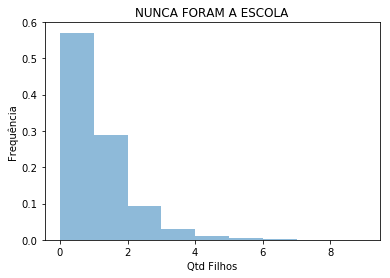

In [133]:
faixa = arange (0, 10, 1)

plot = d2.FILHOSHOMENS[d2.FREQUENTOU_ESCOLA == 'Não'].plot.hist(bins=faixa,title = 'NUNCA FORAM A ESCOLA', normed = 1, alpha=0.5)
plt.ylabel('Frequência')
plt.xlabel('Qtd Filhos')


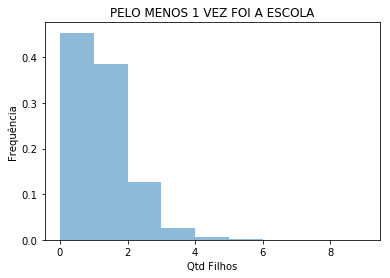

In [122]:
faixa = arange (0, 10, 1)

plot = d2.FILHOSHOMENS[d2.FREQUENTOU_ESCOLA == 'Sim'].plot.hist(bins=faixa,title = 'PELO MENOS 1 VEZ FOI A ESCOLA', normed = 1, alpha=0.5)
plt.ylabel('Frequência')
plt.xlabel('Qtd Filhos')

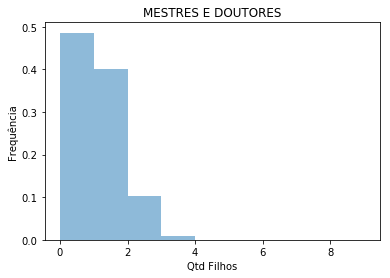

In [124]:
faixa = arange (0, 10, 1)
plot = d2.FILHOSHOMENS[d2.FORMACAO == 'Mestrado-Doutorado'].plot.hist(bins=faixa,title = 'MESTRES E DOUTORES', normed = 1, alpha=0.5)
plt.ylabel('Frequência')
plt.xlabel('Qtd Filhos')

In [146]:
MTSFilhos2 = d2[  (d2.FILHOSHOMENS > 5) | (d2.FILHASMULHERES > 5)].loc[:,[ 'FORMACAO', 'V1141', 'V1142' ]]
MTSFilhos2.head()

,FORMACAO,V1141,V1142
1610,Ensino_Fundamental,NaN,NaN
2179,Ensino_Fundamental,NaN,NaN
2737,Ensino_Fundamental,NaN,NaN
8169,Ensino_Fundamental,NaN,NaN
8929,Ensino_Fundamental,NaN,NaN


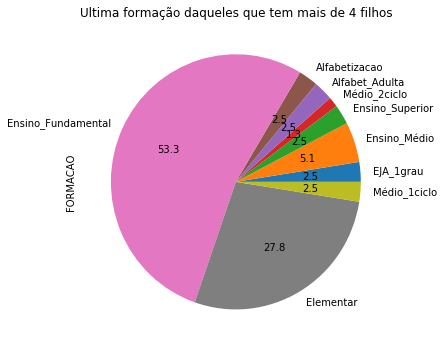

In [147]:
ut7 = (MTSFilhos2.FORMACAO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut7.plot(kind='pie',title='Ultima formação daqueles que tem mais de 4 filhos',autopct='%.1f')


plt.tight_layout()
plt.show()

In [139]:
POUCOSFilhos2 = d2[  (d2.FILHOSHOMENS > 0) & (d2.FILHOSHOMENS < 3) | (d2.FILHASMULHERES > 0) & (d2.FILHASMULHERES < 3) ].loc[:,[ 'FORMACAO', 'V1141', 'V1142' ]]
POUCOSFilhos2.head()

,FORMACAO,V1141,V1142
1,NaN,NaN,NaN
8,Ensino_Médio,NaN,NaN
10,Ensino_Médio,NaN,NaN
15,Elementar,NaN,NaN
17,Elementar,NaN,NaN


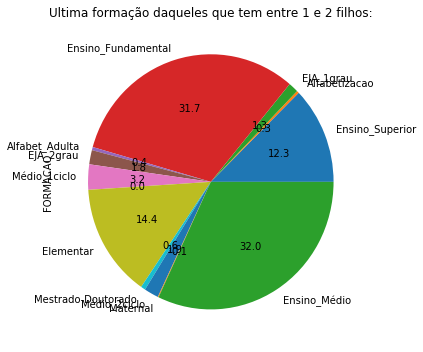

In [145]:
ut8 = (POUCOSFilhos2.FORMACAO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut8.plot(kind='pie',title='Ultima formação daqueles que tem entre 1 e 2 filhos:',autopct='%.1f')


plt.tight_layout()
plt.show()

In [143]:
SEMFilhos2 = d2[  (d2.FILHOSHOMENS < 1) | (d2.FILHASMULHERES < 1)].loc[:,[ 'FORMACAO', 'V1141', 'V1142' ]]
SEMFilhos2.head()

,FORMACAO,V1141,V1142
4,Ensino_Médio,NaN,NaN
8,Ensino_Médio,NaN,NaN
15,Elementar,NaN,NaN
27,Elementar,NaN,NaN
29,Ensino_Superior,NaN,NaN


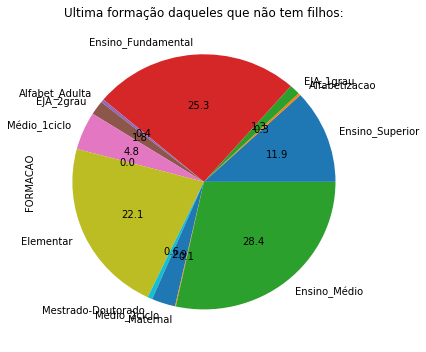

In [144]:
ut9 = (SEMFilhos2.FORMACAO.value_counts(sort=False, normalize=True)*100).round(decimals=1)
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = ut9.plot(kind='pie',title='Ultima formação daqueles que não tem filhos:',autopct='%.1f')


plt.tight_layout()
plt.show()

___
## Conclusão

    Confirmando o que se propunha na matéria do globo.com, em estudo realizado pelo IBGE (http://g1.globo.com/ma/maranhao/noticia/2012/10/segundo-ibge-mulheres-com-maior-nivel-de-escolaridade-tem-menos-filhos.html). Verificou-se que existe um grau de relação, inversamente proporcional, entre o nivel de escolaridade e a quantidade filhos. Ou seja, em linhas gerais, o maior nivel de escolaridade, instrução e formação do indíviduo está atrelado a uma menor taxa de reprodução. No ano de 2015 Ao analisarmos aqueles que têm 5 filhos ou mais, nota-se que 66,7% dos mesmos, encerraram seus estudos no ensino fundamental. Este número cai pela metade quando analisamos indivíduos que tem entre 1 e 2 filhos. Para estes, triplica o numero de pessoas que concluiram o ensino médio e os que concluiram o ensino superior sobem de forma impressionante de um número de 2% para quase 15%.
    Como afirma a especialista em direitos sociais, sexuais e reprodutivos, "as mães de menor grau de escolaridade possuem também menos acesso aos métodos contraceptivos, têm menos informação e educação que são aliados da livre escolha." Uma informação importante que pode explicar este fenômeno verificado.
    Seguindo este raciocínio, se espera que aqueles que tenham 0 escolaridade, ou seja, nunca frequentaram uma instituição de ensino sequer uma vez, tenham muitos filhos quando comparados com os demais. Porém não é isto que acontece quando comparamos o histograma destes com aqueles que possuem mestrados e doutorados. Mais de 60% dos que nunca foram a escola não possuem filhos e 25% dos mesmos possuem entre 1 e 2 filhos. Já os mestres e doutores, em 40% das vezes possuem entre 1 e 2 filhos. Acredita-se que isto pode ser explicado por uma forma de vida e uma situação social bem diferente entre aqueles que possuem baixa escolaridade e os que apresentam 0 escolaridade. A total falta de estrutura social pode interferir nestes resultados.
    Quando comparamos o ano de 2015 com o de 2011, neste estudo, verificam-se poucas diferenças. No entanto, algo que vale ser destacado é que em geral, mesmo de forma tímida, o grau de formação das pessoas evoluiu neste intervalo de tempo (2011 para 2015), independente da quantidade de filhos. Por exemplo: Entre aqueles que não tem filhos, 11% haviam cursado o ensino superior em 2011. Em 2015 este número sobe para 15%. Este mesmo crescimento pode ser encontrado quando analisado aqueles que possuem entre 1 e 2 filhos.